In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.stats import contingency

covid = pd.read_csv('COVID-19 Survey.csv',\
                         sep=',',encoding='latin-1', index_col=0)
# es dürfen gerne weitere/andere Module benutzt werden

Lade den Datensatz zur Umfrage unter Studierenden bezüglich COVID-19.

**1)** *Datenaufbereitung*: Überprüfe ob es fehlende Einträge im Datensatz gibt. Entferne alle Beoabchtungen, wo mehr als ein Drittel der Merkmale keinen Eintrag haben. Wieviele Beobachtungen und welche Anzahl an Merkmalen hat der Datensatz nach dieser Bearbeitung? [2 Punkte]

In [15]:
print("Anzahl Spalten (Merkmale):", covid.shape[1])

print("Anzahl Zeilen (Beobachtungen):", covid.shape[0])

missing_entries = covid.isnull().sum()

# Remove rows where more than 33% of the values are missing (NaN) / Source: https://www.plus2net.com/python/pandas-dataframe-dropna-thresh.php
data_cleaned = covid.dropna(axis=0, thresh=covid.shape[1] * 0.33)

print("Anzahl der fehlenden Einträge pro Merkmal: ")
print(missing_entries)

print("Datensatzgröße vor der Bereinigung:", covid.shape)
print("Datensatzgröße nach der Bereinigung:", data_cleaned.shape)
                                                    

Anzahl Spalten (Merkmale): 18
Anzahl Zeilen (Beobachtungen): 1182
Anzahl der fehlenden Einträge pro Merkmal: 
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                        17


**2)** *Datenuntersuchung*: Welche Merkmale im Datensatz sind nominal und welche Merkmale sind ordinal skaliert? Bestimme anschließend die Modi aller nominalen Merkmale und gib sie in einer übersichtlichen Darstellungen an. Welche findest du überraschend? [4 Punkte]


In [42]:
nominal_features = ([
    "Region of residence",
    "Medium for online class",
    "Prefered social media platform",
    "Health issue during lockdown",
    "Stress busters",
    "Do you find yourself more connected with your family, close friends , relatives  ?",
    "What you miss the most"
])

ordinal_features = ['Age of Subject', 'Rating of Online Class experience','Change in your weight']


modus_df = pd.DataFrame(columns=["Merkmal", "Modus", "Anzahl"])

for merkmal in nominal_features:
    #modus will take the most frequent value for each feature and iloc will take the first one if there are several.
    modus = covid[merkmal].mode().iloc[0]
    modus_count = (covid[merkmal] == modus).sum()
    data = {"Merkmal" : merkmal, "Modus": modus, "Anzahl": modus_count}
    modus_df = modus_df._append(data , ignore_index=True)
    
display(modus_df)

#Interessant ist, dass die Mehrheit der Befragten während des Lockdowns keine 'health issues' hatte. 
#Erstaunlich ist auch, dass so viele während des Lockdowns eine bessere Verbindung zu Freunden, Familie und Verwandten haben.

,Merkmal,Modus,Anzahl
0,Region of residence,Delhi-NCR,721
1,Medium for online class,Laptop/Desktop,545
2,Prefered social media platform,Instagram,352
3,Health issue during lockdown,NO,1021
4,Stress busters,Listening to music,276
5,Do you find yourself more connected with your ...,YES,831
6,What you miss the most,School/college,379


**3)** *Grafische Auswertung*: 
- Stelle für das Merkmal *Medium for online class* die absoluten Häufigkeiten dar.
- Stelle für das Merkmal *Prefered social media platform* die relativen Häufigkeiten dar.
- Stelle für das Merkmal *Rating of Online Class experience* die relativen Häufigkeiten dar. Sortiere dabei die Merkmalsausprägungen nach deiner gewählten Reihenfolge.
- Stelle für das Merkmal *Time spent on Online Class* die kumulative Häufigkeit dar.

Leite aus diesen Darstellungen jeweils eine Erkenntnis pro Darstellung ab. [9 Punkte]

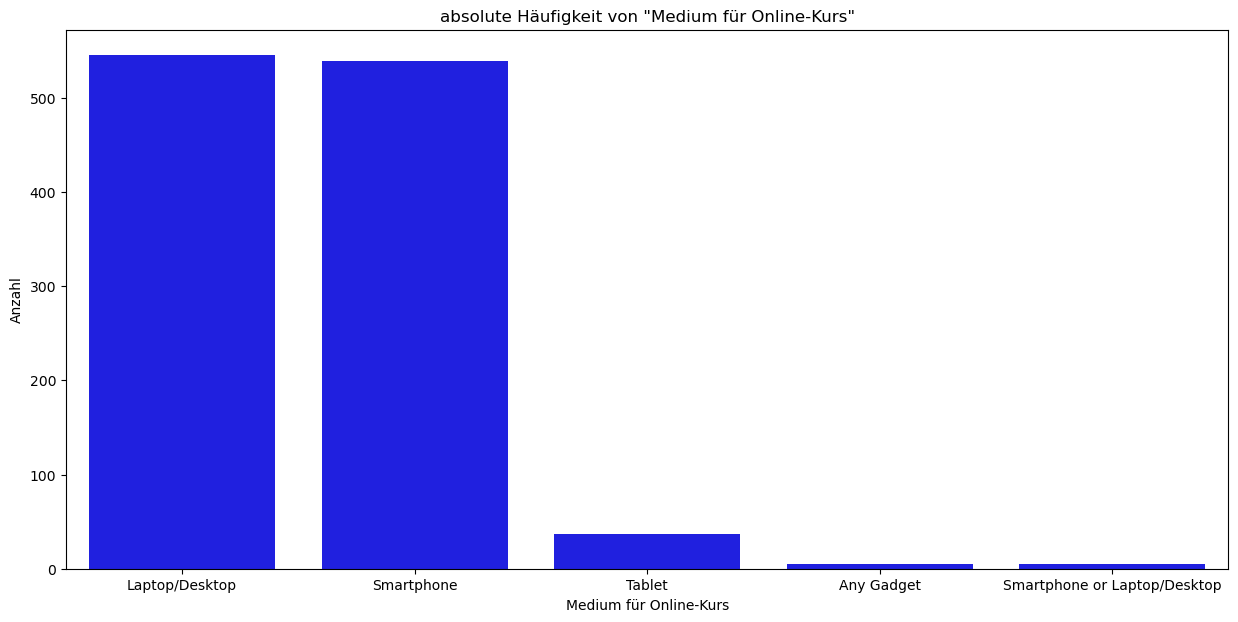

In [54]:
fig, axs = plt.subplots(figsize =(15, 7))

sea.countplot(data=covid, x='Medium for online class', color='blue')

plt.title('absolute Häufigkeit von "Medium für Online-Kurs"')

axs.set(xlabel = 'Medium für Online-Kurs', ylabel='Anzahl')

plt.show()
# Erkenntnis: Überraschend ist, dass Smartphones und Laptops bzw. Desktops fast gleichauf liegen.

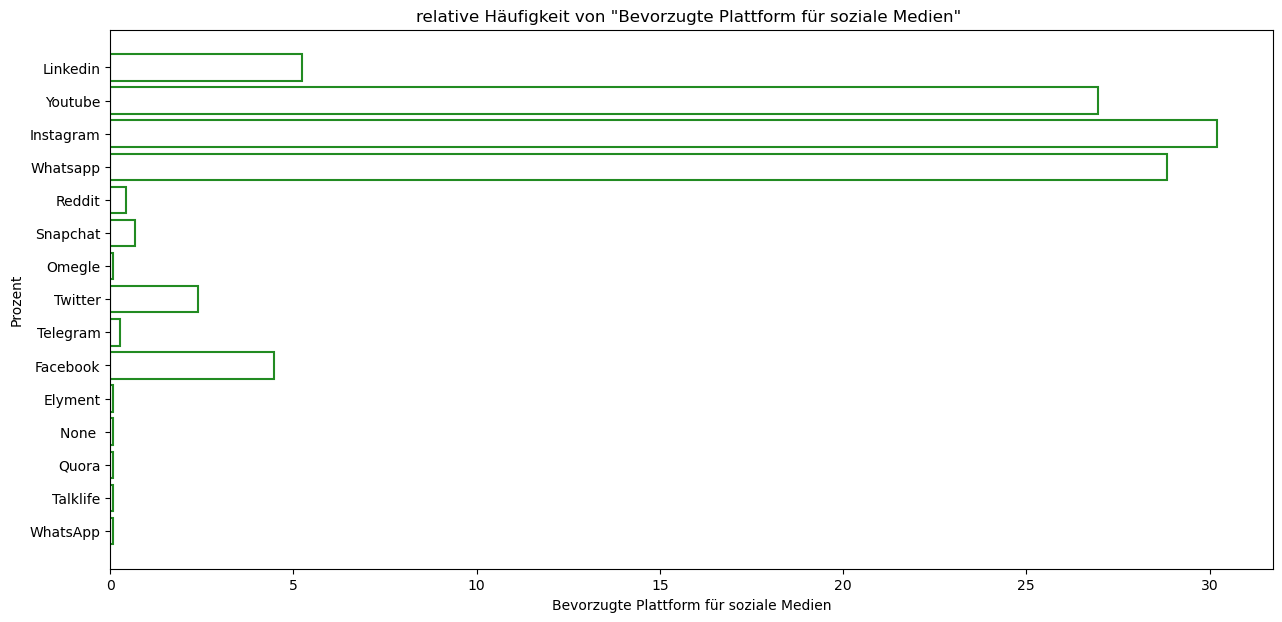

In [86]:
fig, axs = plt.subplots(figsize =(15, 7))
sea.histplot(data=covid, y='Prefered social media platform', stat='percent', shrink=0.8, \
             discrete=True, fill=False, color='forestgreen')

plt.title('relative Häufigkeit von "Bevorzugte Plattform für soziale Medien" ')
axs.set(xlabel = 'Bevorzugte Plattform für soziale Medien', ylabel='Prozent')
plt.show()

# Erkenntnis: Interessant ist, dass Instagram, Whatsapp und Youtube so dicht beieinander liegen. Dass Facebook so weit hinten liegt, ist vermutlich der Altersgruppe der Befragten geschuldet, die eher jung ist.

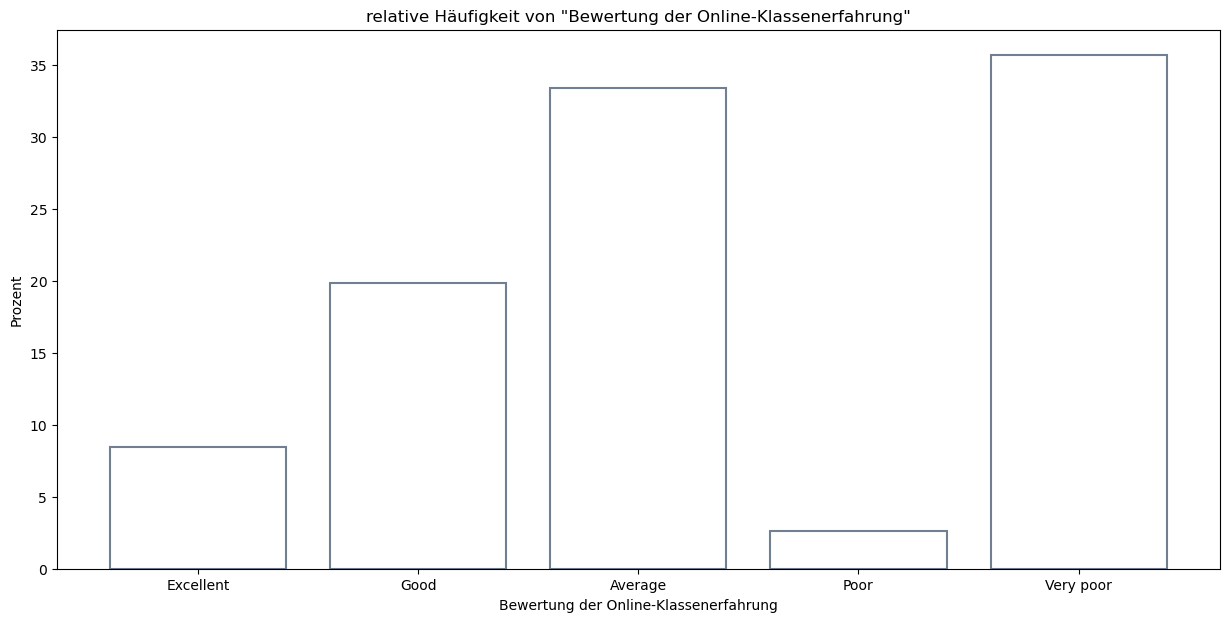

In [85]:
order = ['Excellent', 'Good', 'Average', 'Poor', 'Very poor']

fig, axs = plt.subplots(figsize=(15,7))

covid_sorted = covid

covid_sorted['Rating of Online Class experience'] = pd.Categorical(covid_sorted['Rating of Online Class experience'], categories=order, ordered=True)


sea.histplot(data=covid_sorted, x='Rating of Online Class experience', stat='percent', shrink=0.8, discrete=True, fill=False, color='slategray')

axs.set(xlabel = 'Bewertung der Online-Klassenerfahrung', ylabel='Prozent')
plt.title('relative Häufigkeit von "Bewertung der Online-Klassenerfahrung"')
plt.show()

# Erkenntnis: Interessant ist, dass die Erfahrung mit dem Online-Unterricht 'Very poor' ist, was wahrscheinlich darauf zurückzuführen ist, 
# dass der Übergang zum Online-Unterricht während des Lockdowns stattfand und die Rahmenbedingungen nicht so gut waren.

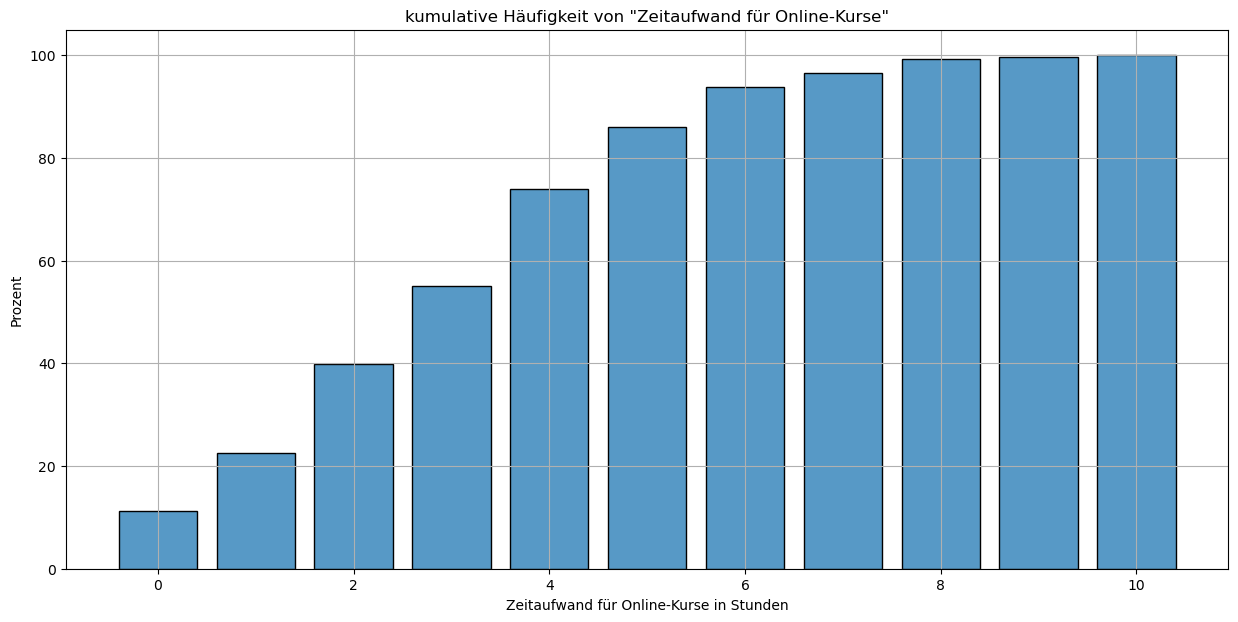

In [91]:

fig, axs = plt.subplots(figsize=(15,7))

sea.histplot( data = covid, x ='Time spent on Online Class', stat='percent', cumulative=True, element='bars', discrete=True, shrink=0.8)
axs.set_title('kumulative Häufigkeit von "Zeitaufwand für Online-Kurse"')
axs.grid()
axs.set(xlabel = 'Zeitaufwand für Online-Kurse in Stunden', ylabel='Prozent')
plt.show()

# Es ist interessant, dass es negative Stunden gibt, dies kann nicht der Realität entsprechen, da man nicht weniger als 0 Stunden Aufwand haben kann.


**4)** *Quantitative Merkmale*: Berechne Mittelwert, Median, Spannweite und Standardbaweichung für die metrischen Merkmale welche mit *Time spent on ..* beginnen. Speicher die Werte in einen neuen Dataframe und lass dir diesen anzeigen. Wie erklären sich die Unterschiede zwischen Mittelwert und Median? Stelle anschließend **in einer Grafik** die Boxplots für alle diese Merkmale dar. Leite mindestens zwei Aussagen aus den Vergleiche der Boxplots ab.

*Hinweis*: Es ist notwendig beim Merkmal *Time spent on TV* die Daten zuerst in eine numerische Form zu transformieren.
[9 Punkte]



,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV
Mittelwert,3.208841,2.911591,0.765821,7.871235,2.365694,1.015678
Median,3.0,2.0,1.0,8.0,2.0,1.0
Spannweite,10.0,18.0,5.0,11.0,10.0,15.0
Standardabweichung,2.101756,2.14059,0.724451,1.615762,1.767336,1.267532


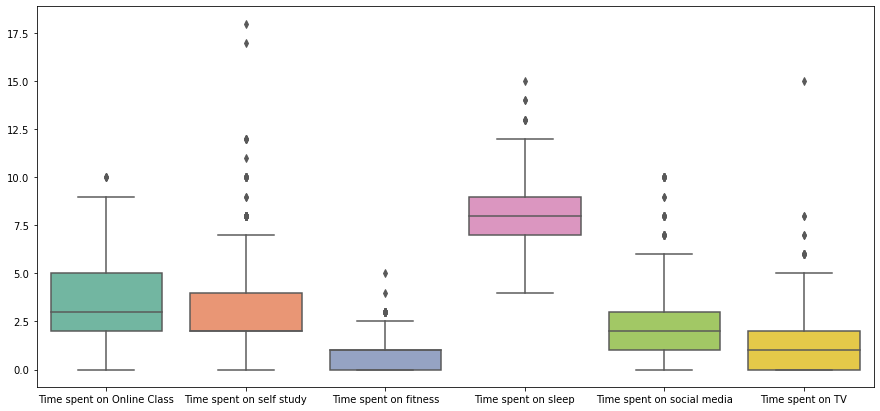

In [48]:
attributes_Time = []

for attribute in covid.columns:
    if attribute.startswith('Time spent on'):
        attributes_Time.append(attribute)

#DataFrame with only the 'Time spent on' columns
time_spent_data = covid[attributes_Time]

# Convert the columns to numeric
time_spent_data = time_spent_data.apply(pd.to_numeric, errors='coerce')

#Create a new Dataframe
metric_data = pd.DataFrame(index=['Mittelwert', 'Median', 'Spannweite', 'Standardabweichung'], columns=attributes_Time)

# Calculate the metrics for the numeric columns
for attribute in attributes_Time:
    metric_data.loc['Mittelwert', attribute] = time_spent_data[attribute].mean()
    metric_data.loc['Median', attribute] = time_spent_data[attribute].median()
    metric_data.loc['Spannweite', attribute] = time_spent_data[attribute].max() - time_spent_data[attribute].min()
    metric_data.loc['Standardabweichung', attribute] = time_spent_data[attribute].std()

    
display(metric_data)

fig, axs = plt.subplots(figsize=(15, 7), sharex=True)

sea.boxplot(data=time_spent_data, ax=axs, palette='Set2')

plt.show()


# Unterschied / Differenz zwischen Median und Mittelwert: Die Differenz entsteht durch die Ausreißer, die den Mittelwert verzerren. Der Median ist davon nicht betroffen, da er robust gegenüber Ausreißern ist.
# Erkenntnisse: Es ist erstaunlich zu sehen, dass die Zeit für die Fitness so gering ist gegenüber beispielsweise der Zeit verbracht auf Social Media.
# Interessant ist auch, dass die Spannweite bei 'Time spent on self study' so groß ist, was auf einen großen Unterschied in der aufgewendeten Zeit hinweist.


**5)** *Zusammenhänge Qualitativer Merkmale*: Bestimme die korrigierten Kontingenzkoeffizienten der Zusammenhänge zwischen dem Merkmal *Time utilized* und **allen** anderen nominalen und ordinalen Merkmalen. Stelle die Werte in einer Grafik deiner Wahl dar. Bewerte die Ergebnisse für die Merkmale mit dem niedrigsten und dem höchsten gefundenen Zusammenhang. Bestimme anschließend die folgenden bedingten Häufigkeiten:
- P(Rating of Online class experience = Excellent | Health Issue = No)
- P(Health Issue = No | Rating of Online class experience = Excellent)
[7 Punkte]


,Region of residence,Medium for online class,Health issue during lockdown,Prefered social media platform,Change in your weight,Rating of Online Class experience,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Age of Subject,Stress busters
Korrigierte Kontigenzkoeffizienten,0.02635,0.094811,0.12985,0.138423,0.139589,0.265059,0.287044,0.315346,0.349367,0.418138


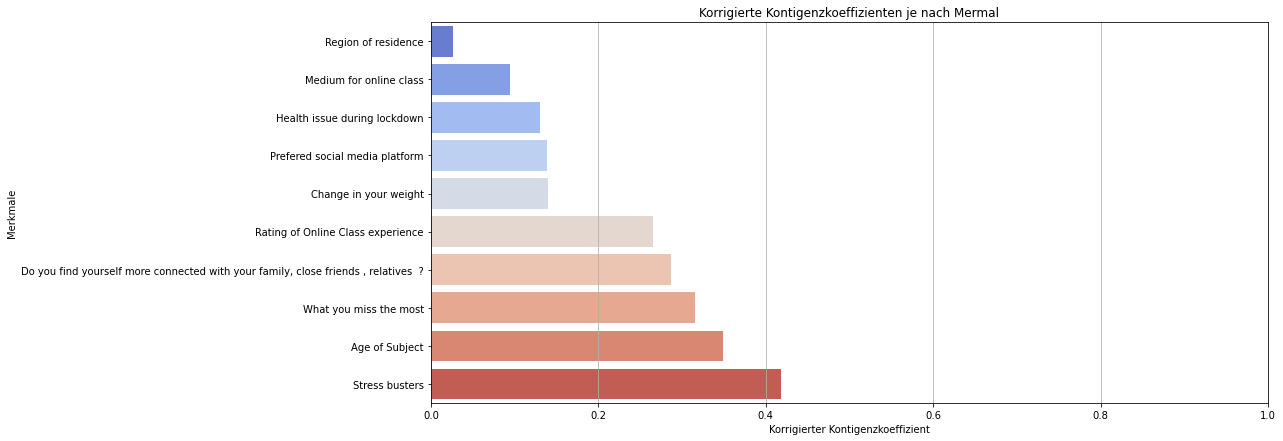

In [49]:
#display(covid)
corrected_contingency_coefficients = ([])

qual_features = nominal_features + ordinal_features

for att in qual_features:
    if att != 'Time utilized':
        ctAbsolut = pd.crosstab(covid['Time utilized'], [covid[att]])
        chi2, pValue, ddof, expFreq = contingency.chi2_contingency(ctAbsolut)
        n = covid.shape[0]
        k = min(ctAbsolut.shape)
        pearson_contingency_coefficient = np.sqrt(chi2 / (n + chi2))
        corrected_contingency_coefficient = (np.sqrt(k / (k-1))) * pearson_contingency_coefficient
        corrected_contingency_coefficients.append({att: corrected_contingency_coefficient})

columns = []
values = []

for item in corrected_contingency_coefficients:
    column_name, value = list(item.keys())[0], list(item.values())[0]
    columns.append(column_name)
    values.append(value)
    
Corrected_Contingency = pd.DataFrame(data=[values], columns=columns, index=['Korrigierte Kontigenzkoeffizienten'])

sorted_Corrected_Contingency = Corrected_Contingency.sort_values(by='Korrigierte Kontigenzkoeffizienten', axis=1, ascending=True)

display(sorted_Corrected_Contingency)

plt.figure(figsize=(15,7))
sea.barplot(data= sorted_Corrected_Contingency, palette='coolwarm', orient='h')
plt.xlabel('Korrigierter Kontigenzkoeffizient')
plt.ylabel('Merkmale')
plt.title('Korrigierte Kontigenzkoeffizienten je nach Mermal')
plt.xlim(0,1)
plt.grid(axis='x')
plt.show()


**6)** *Zusammenhänge Quantitativer Merkmale*: Stelle einen Pairplot für die quantitativen Merkmale dar und berechne die Korrelationskoeffizienten zwischen den Merkmalen. Stelle die Korrelationskoeffizienten ebenfalls übersichtlich dar. Interpretiere anschließend die gefundenen Werte unter Einbezug der entsprechenden grafischen Darstellungen. Welche Zusammenhänge findest du dabei überraschend und bei welchen Zusammenhängen bestätigen sich deine anfänglichen Vermutungen? [7 Punkte]




                            Time spent on Online Class  \
Time spent on Online Class                    1.000000   
Time spent on self study                      0.119318   
Time spent on fitness                        -0.026745   
Time spent on sleep                          -0.177782   
Time spent on social media                   -0.117121   

                            Time spent on self study  Time spent on fitness  \
Time spent on Online Class                  0.119318              -0.026745   
Time spent on self study                    1.000000               0.022088   
Time spent on fitness                       0.022088               1.000000   
Time spent on sleep                        -0.218573              -0.043975   
Time spent on social media                 -0.162613              -0.042855   

                            Time spent on sleep  Time spent on social media  
Time spent on Online Class            -0.177782                   -0.117121  
Time spent on self s

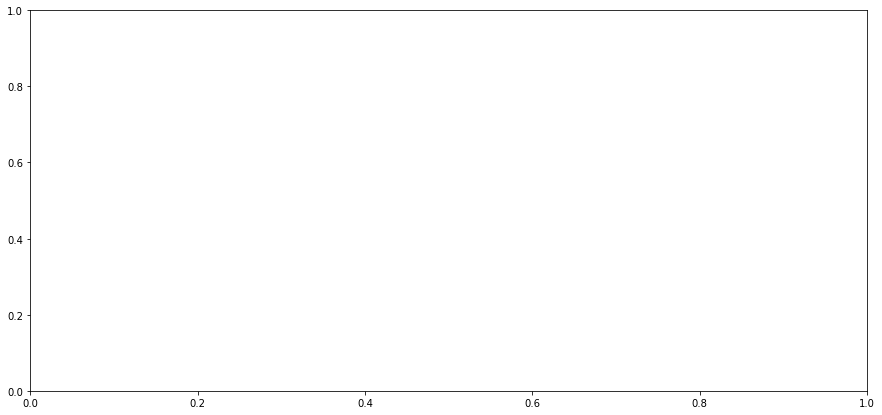

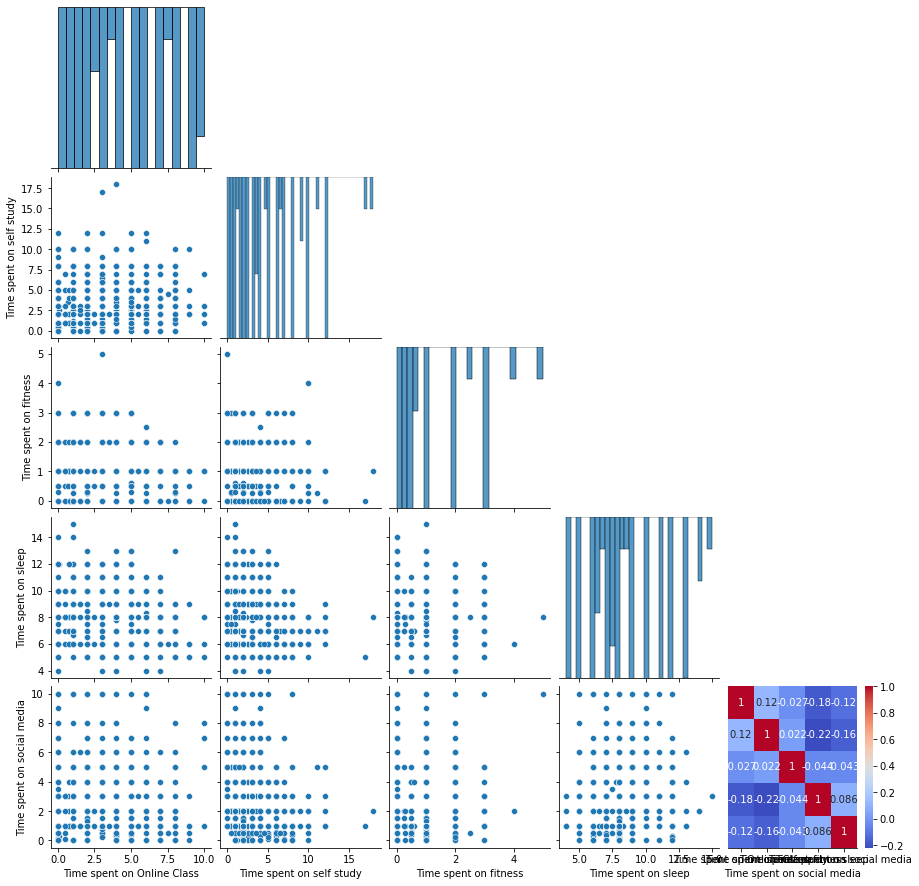

In [51]:
attributes_Time = []

for attribute in covid.columns:
    if attribute.startswith('Time spent on'):
        attributes_Time.append(attribute)

#DataFrame with only the 'Time spent on' columns
time_spent_data = covid[attributes_Time]

correlation_matrix = time_spent_data.corr()

print(correlation_matrix)

sea.pairplot(data = time_spent_data, corner=True)
sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


**Hinweise**:
- Übersicht der verschiedenen möglichen Farben in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html
- Bitte beschrifte alle Grafiken an den Achsen und füge wenn nötig eine Legende ein. Achte dabei auf die Lesbarkeit der Elemente.
- Gestalte die Grafiken und das Layout der Grafiken übersichtlich. Also nicht 6 Grafiken untereinander, wenn man diese miteinander vergleichen soll. Zusätzlich muss der Inhalt der Grafiken lesbar sein.